In [1]:
import locale
locale.setlocale(locale.LC_ALL, '')

import matplotlib as mpl
mpl.rcParams.update({'font.size': 14, 'text.usetex':False})
mpl.rcParams['axes.formatter.use_locale'] = True

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fluor = pd.read_excel('Fluorescencia.xlsx')
fluor.columns = ['conc', 'int']
itc = pd.read_excel('ITC_thiago.xlsx')
itc.columns = ['conc', 'DH']
visc = pd.read_excel('Visc_sem_ptos_ruins.xlsx')
visc.columns = ['conc', 'eta']

In [3]:
def integrator(x):
    acc = []
    for i in range(len(x)):
        acc.append(sum(x[:i]))
    return np.array(acc)

def normaliz(x, norm):
    return x / norm

# Fluorescência e ITC

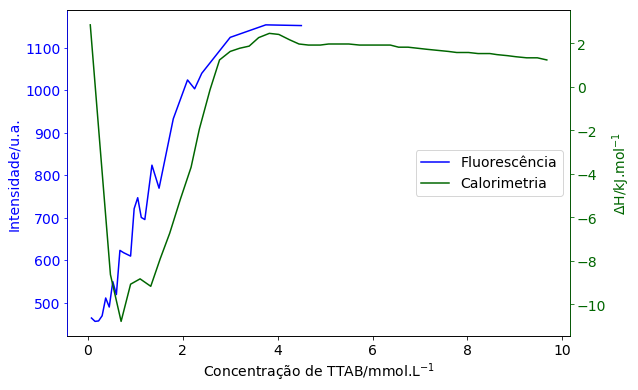

In [4]:
mpl.rcParams.update({'font.size': 14, 'text.usetex':False})

fig, ax1 = plt.subplots(figsize=(9,6))
ax2 = ax1.twinx()

# ax1.plot(fluor['conc'], normaliz(fluor['int'], max(fluor['int'])), c='C0', label='')
# ax2.plot(itc['conc'], normaliz(itc['DH'], max(itc['DH'])), c='C1')

l1 = ax1.plot(fluor['conc'], fluor['int'], c='blue', label='')
l2 = ax2.plot(itc['conc'], itc['DH'], c='#006600')

ax1.set(xlabel='Concentração de TTAB/mmol.L$^{-1}$', ylabel='Intensidade/u.a.')
ax2.set(ylabel=r'$\Delta$H/kJ.mol$^{-1}$')

ax2.spines['left'].set_color('blue')
ax2.spines['right'].set_color('#006600')
ax1.yaxis.label.set_color('blue')
ax2.yaxis.label.set_color('#006600')
ax1.tick_params(axis='y', colors='blue')
ax2.tick_params(axis='y', colors='#006600')

ax1.legend(ax1.get_lines() + ax2.get_lines(), ['Fluorescência', 'Calorimetria'], loc='center right')

# Fluorescência, ITC e viscosidade

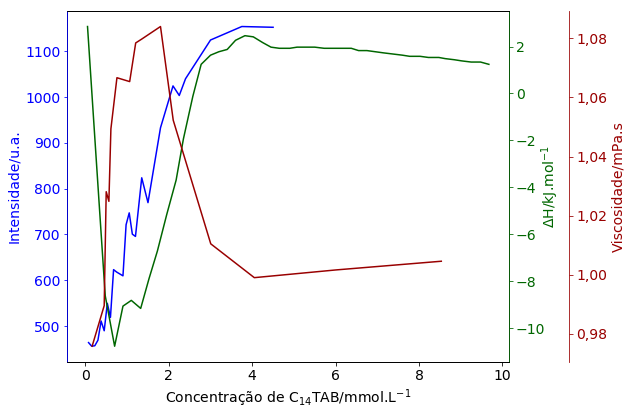

In [7]:
mpl.rcParams.update({'font.size': 14, 'text.usetex':False})

cor1 = 'blue'
cor2 = '#006600'  # verde
cor3 = '#990000'  # vermelho

fig, ax1 = plt.subplots(figsize=(9,6))
ax2 = ax1.twinx()
ax3 = ax1.twinx()

l1 = ax1.plot(fluor['conc'], fluor['int'], c=cor1, label='')
l2 = ax2.plot(itc['conc'], itc['DH'], c=cor2)
l3 = ax3.plot(visc['conc'], visc['eta'], c=cor3)

ax1.set(xlabel=r'Concentração de C$_{14}$TAB/mmol.L$^{-1}$', ylabel='Intensidade/u.a.')
ax2.set(ylabel=r'$\Delta$H/kJ.mol$^{-1}$')
ax3.set(ylabel='Viscosidade/mPa.s')

# Cores eixos
ax3.spines['left'].set_color(cor1)
ax2.spines['right'].set_color(cor2)
ax3.spines['right'].set_color(cor3)

# Cores ticks
ax1.tick_params(axis='y', colors=cor1)
ax2.tick_params(axis='y', colors=cor2)
ax3.tick_params(axis='y', colors=cor3)

# Cores labels
ax1.yaxis.label.set_color(cor1)
ax2.yaxis.label.set_color(cor2)
ax3.yaxis.label.set_color(cor3)

ax2.yaxis.labelpad = -6

ax3.spines['right'].set_position(('outward', 60))
fig.tight_layout()
fig.savefig('../../../fluor/combinacao_propriedades.pdf')

## Integrando o gráfico de ITC

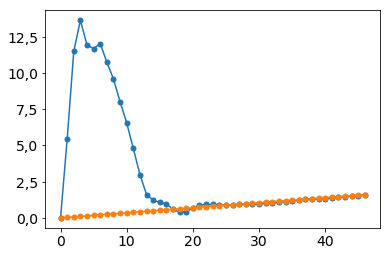

In [8]:
## Movendo os dados para conseguir integrar numericamente
dh_novo = itc['DH'] * -1
dh_novo = dh_novo - min(dh_novo)
lin_base = np.linspace(dh_novo[0], dh_novo[len(dh_novo)-1], len(dh_novo))
plt.plot(dh_novo, markersize=5, marker='o')
plt.plot(lin_base, markersize=5, marker='o')

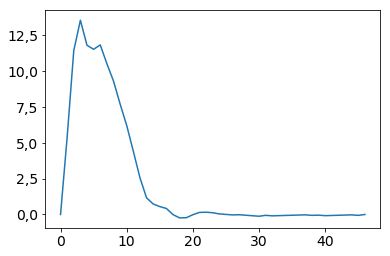

In [9]:
## Novo gráfico com a nova linha base
dh_novo2 = dh_novo - lin_base
plt.plot(dh_novo2)

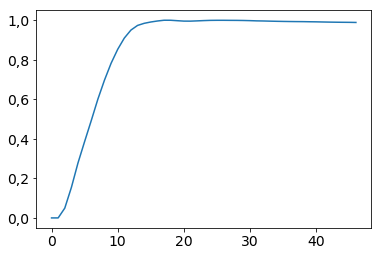

In [10]:
## Integrando o ITC
dh_int = integrator(dh_novo2)
dh_int_norm = normaliz(dh_int, max(dh_int))
plt.plot(dh_int_norm)

## Integrando o gráfico de viscosidade

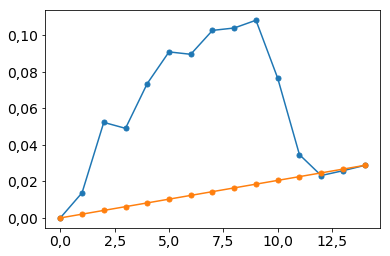

In [11]:
## Movendo os dados para conseguir integrar numericamente
visc_novo = visc['eta'] - min(visc['eta'])
lin_base_2 = np.linspace(visc_novo[0], visc_novo[len(visc_novo)-1], len(visc_novo))
plt.plot(visc_novo, markersize=5, marker='o')
plt.plot(lin_base_2, markersize=5, marker='o')

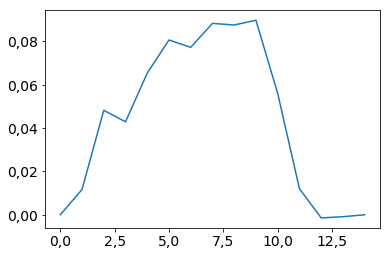

In [12]:
visc_novo2 = visc_novo - lin_base_2
plt.plot(visc_novo2)

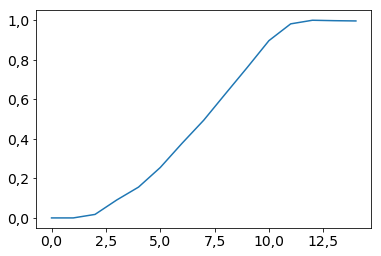

In [13]:
visc_int = integrator(visc_novo2)
visc_norm = normaliz(visc_int, max(visc_int))
plt.plot(visc_norm)

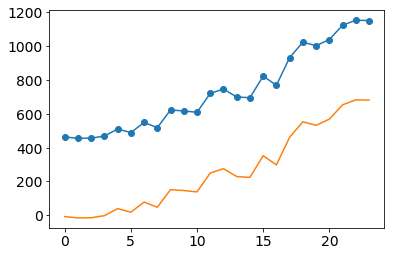

In [14]:
## Subtraindo a "linha base" do sinal de fluorescência
fluor_base = fluor['int'].iloc[0:5].mean()
fluor_desl = fluor['int'] - fluor_base
plt.plot(fluor['int'], marker='o')
plt.plot(fluor_desl)


## Plotando os gráficos integrados e normalizados

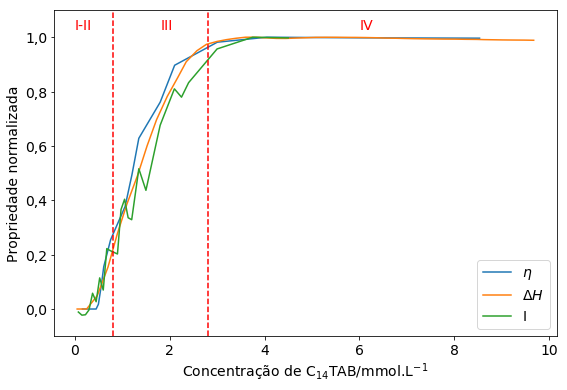

In [15]:
fig, ax = plt.subplots(figsize=(9,6))

ax.plot(visc['conc'], visc_norm, label='$\eta$')
ax.plot(itc['conc'], dh_int_norm, label='$\Delta H$')
ax.plot(fluor['conc'], normaliz(fluor_desl, max(fluor_desl)), label='I')
ax.set(xlabel=r'Concentração de C$_{14}$TAB/mmol.L$^{-1}$', ylabel='Propriedade normalizada')

ax.legend()
ax.set_ylim(-0.1, 1.1)
ax.axvline(0.8, c='r', linestyle='--')
ax.axvline(2.8, c='r', linestyle='--')
ax.text(0., 1.03, 'I-II', color='red')
ax.text(1.8, 1.03, 'III', color='red')
ax.text(6, 1.03, 'IV', color='red')

fig.savefig(r'../../../fluor/correlacoes_propriedades.pdf')

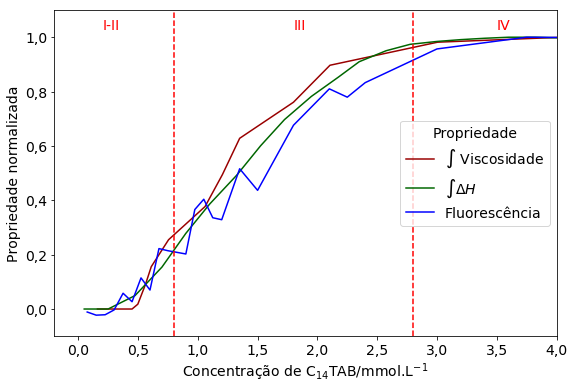

In [16]:
fig, ax = plt.subplots(figsize=(9,6))

cor1 = 'blue'
cor2 = '#006600'  # verde
cor3 = '#990000'  # vermelho

ax.plot(visc['conc'], visc_norm, label='$\int$ Viscosidade', color=cor3)
ax.plot(itc['conc'], dh_int_norm, label='$\int\Delta H$', color=cor2)
ax.plot(fluor['conc'], normaliz(fluor_desl, max(fluor_desl)), label='Fluorescência', color=cor1)
ax.legend(loc=5, title='Propriedade')

ax.set(xlabel=r'Concentração de C$_{14}$TAB/mmol.L$^{-1}$', ylabel='Propriedade normalizada')
ax.set_ylim(-0.1, 1.1)
ax.set_xlim(-0.2, 4)

ax.axvline(0.8, c='r', linestyle='--')
ax.axvline(2.8, c='r', linestyle='--')

ax.text(0.2, 1.03, 'I-II', color='red', )
ax.text(1.8, 1.03, 'III', color='red',)
ax.text(3.5, 1.03, 'IV', color='red',)

fig.savefig(r'../../../fluor/correlacoes_propriedades_zoom.pdf')

## Fazendo a derivada da intensidade para ver se tem correlação com os outros

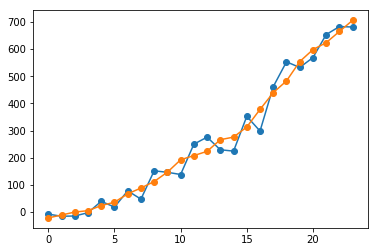

In [148]:
from scipy.signal import savgol_filter
filtrado = savgol_filter(fluor_desl, window_length=5, polyorder=1)
filtrado = savgol_filter(filtrado, window_length=5, polyorder=1)
plt.plot(fluor_desl, marker='o')
plt.plot(filtrado, marker='o')

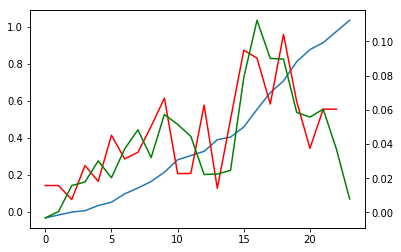

In [158]:
filtrado = savgol_filter(normaliz(fluor_desl, max(fluor_desl)), window_length=5, polyorder=1)
filtrado = savgol_filter(normaliz(fluor_desl, max(fluor_desl)), window_length=5, polyorder=1)

deriv = np.diff(filtrado, n=1)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()



ax1.plot(filtrado)
ax2.plot(deriv, c='r')
ax2.plot(savgol_filter(normaliz(fluor_desl, max(fluor_desl)), window_length=5, polyorder=1, deriv=1, mode='nearest'), c='green')